#  Проработка вариантов решения

На данном этапе вам необходимо:


    
    
- Проанализировать имеющиеся решения
- Обозначить основные плюсы и минусы каждого из потенциальных решений
- Выбрать подходящее решение (алгоритм или набор алгоритмов) для данной задачи и обосновать его

## Топ самых популярных

#### Идея

Выдаем рекомендации как топ популярных по какому-либо группе.

#### Достоинства:
- легко имплементировать;
- легко настраивать;
- скорость работы (можно посчитать в рамках временного периода и далее просто выдавать готовый ответ).
#### Недостатки:
- отсутсвие персонализации;
- не рекомендует специфичные и редкие товары;
- не учитывает сложные зависимости и порядок;
- слабое покрытие;
- не опирается на дополнительную информацию про пользователей и товары;
- проблема холодного старта для товаров.

## KNN
### user-base KNN
#### Идея

Похожим пользователям рекомендуем похожие товары на основании некоторой метрики схожести. Оценка рейтинга товара, как среднее по соседям с весами.

$$
\hat{r}_{ui} = \frac{\sum_{v \in N(u)} s(u,v)r_{vi}}{\sum_{v \in N(u)} |s(u,v)| }
$$

Варианты метрики:
- скалярное произведение
векторов общих рейтингов;
- нормированное число
общих товаров, мера Жаккара ;
- корреляция Пирсона между
векторами общих рейтингов;
- косинусная мера близости;

#### Достоинства:
- скорость работы;
- интерпретируемость;

#### Недостатки:
- отдает предпочтение более популярным товарам, слабое покрытие;
- не учитывает сложные зависимости;
- проблема холодного старта для пользователей и товаров;
- для нового пользователя необходимо пересчитывать матрицу похожести;
- не учитывает хронологический порядок;
- не опирается на дополнительную информацию про пользователей и товары(а в нашем случае у нас такая имеется).

### item-base KNN
#### Идея

К оцененным пользователем товарам найдем наиболее похожие на них и порекомендуем. Похожесть между айтемами определяется, как
косинусная мера с поправкой на средний рейтинг
пользователей,


#### Достоинства:
- скорость работы;
- интерпретируемость;
- учитывает все товары в сессии.

#### Недостатки:
- отдает предпочтение более популярным товарам, слабое покрытие;
- не учитывает сложные зависимости;
- проблема холодного старта для пользователей и товаров;
- для каждой сессии необходимо пересчитывать матрицу похожести;
- не учитывает хронологический порядок;
- не опирается на дополнительную информацию про пользователей и товары.

### Session-based kNN
#### Идея

Пользователям с похожими сессиями  рекомендуем похожие товары на основании некоторой метрики схожести. Оценка рейтинга товара, как среднее по соседям с весами.


#### Достоинства:
- легко имплементировать;
- скорость работы;
- интерпретируемость;
- учитывает только последнюю сессию.

#### Недостатки:
- отдает предпочтение более популярным товарам, слабое покрытие;
- не учитывает сложные зависимости;
- проблема холодного старта для пользователей и товаров;
- для новой сессии необходимо пересчитывать матрицу похожести;
- не учитывает хронологический порядок;
- не опирается на дополнительную информацию про пользователей и товары.




## Content-based рекомендации
### Идея
Измерение похожести между объектами на основе их содержания.

Их будем использовать вместе с коллаборативной фильтрацией для пущего успеха

## Matrix factorizations

#### Идея

Факторизовать матрицу user-item. Матричная факторизация - разложение матрицы на произведение двух или более матриц.

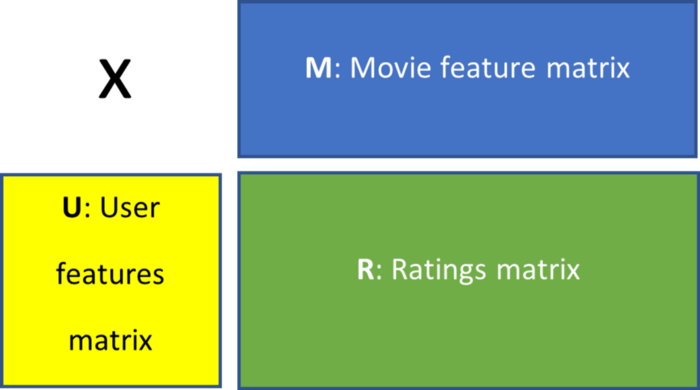




## SVD

SVD разлагает матрицу на три составные матрицы: U, Σ и $V^T$.
U: Представляет собой левые сингулярные векторы, которые описывают отношения между пользователями и латентными факторами.
Σ: Диагональная матрица, содержащая сингулярные значения, которые указывают на важность каждого латентного фактора.
$V^T$: Представляет собой правые сингулярные векторы, которые описывают связь между элементами и латентными факторами.

#### Достоинства:

- скорость работы (один раз факторизовали и дальше используем);
- интерпретируемость;
- выделяет группы пользователей и их интересы;
- фиксирует как глобальные, так и локальные закономерности в данных.

#### Недостатки:
- необходимо полностью пересчитывать для актуализации данных;
- линейный метод;
- требует вычисления полного разложения матрицы uer-item, что вычислительно дорого и требует много памяти;
- не опирается на дополнительную информацию про пользователей и товары;
- сложно распараллелить;
- не учитывает хронологический порядок;
- проблема холодного старта.


## TimeSVD++

### Идея

Учитывает зависимость от времени. Если данные растянуты на несколько лет и вкусы пользователя за это время поменялись, тогда рекомендовать стоит что-то ближе к текущему времени, а иначе модель будет выдавать некоторое "среднее значение по вкусу".

#### Достоинства:

- скорость работы (один раз факторизовали и дальше используем);
- интерпретируемость;
- выделяет группы пользователей и их интересы;
- фиксирует как глобальные, так и локальные закономерности в данных;
- способен учитывать явный и неявный фидбек;
- учитывает хронологический порядок.

#### Недостатки:
- линейный метод;
- требует вычисления полного разложения матрицы user-item, что вычислительно дорого и требует много памяти;
- не опирается на дополнительную информацию про пользователей и товары;
- сложно распараллелить;
- необходимо полностью пересчитывать для актуализации.




## Implicit Alternating Least Squares (Implicit ALS)

### Идея

Метод неявных чередующихся наименьших квадратов - это вариант ALS, специально предназначенный для систем рекомендаций, где доступны только неявные данные обратной связи, такие как клики(в нашем случае). Метод решает проблемы, связанные с неявными данными обратной связи, где отсутствие явных рейтингов затрудняет определение предпочтений пользователей напрямую.

#### Достоинства:

- скорость работы (один раз факторизовали и дальше используем);
- интерпретируемость;
- выделяет группы пользователей и их интересы;
- фиксирует как глобальные, так и локальные закономерности в данных;
- способен учитывать неявный фидбек;
- оптимизированн для масштабируемости и распределенного вычисления;
- частично решает проблему холодного старта.

#### Недостатки:
- линейный метод;
- вычислительно дорогой и требует много памяти;
- не опирается на дополнительную информацию про пользователей и товары;
- не учитывает временную хронологию.

## Двухэтапная модель

### Идея
1. Отбор кандидатов. С помощью простых моделей получаем некоторое меньшее множество товаров кандидатов.
2. Используем отдельную модель для переранжирования результатов (например бустинг).
  - Binary classification;
  - Learning to rank;
  - Regression.

### Достоинства:

- можем учитывать разные временные признаки;
- можем смешивать результаты от разных моделей;
- фиксирует как глобальные, так и локальные закономерности в данных;
- можем учитывать неявный фидбек;
- можем учитывать дополнительную информацию про пользователей и товары;
- можем комбинировать разные модели;
- модульность;
- частично решить проблему холодного старта.

### Недостатки:
- необходимо обучать несколько моделей, более сложный пайплайн;
- требует большого количества данных;
- требует большего количества ресурсов.

## item2vec model
### Идея
Мы отображаем товар в вектор в некотором многомерном пространстве таким образом, что похожие товара имеют близкие векторы в этом пространстве.

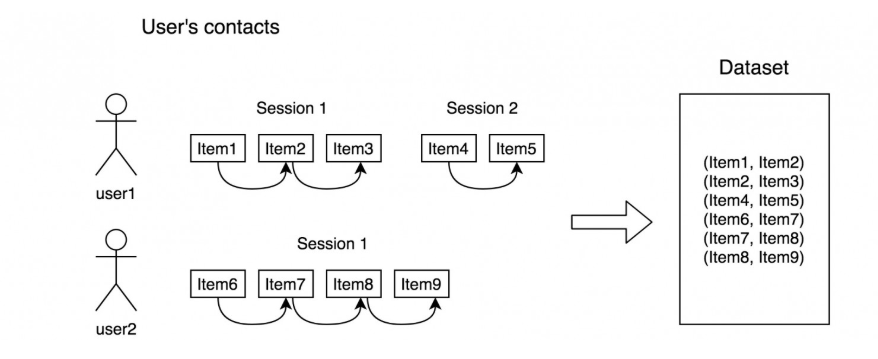

## Нейронные сети
### Neural Matrix Factorization

#### Идея
Используем item2vec и user2vec энкодеры для создния скрытого представления пользователей и товаров, с помощью нейронной сети определяем близость и даем оценку.

### Достоинства:

- можем учитывать разные временные признаки;
- нелинейность;
- эффективное представление пользователей и товаров;
- фиксирует как глобальные, так и локальные закономерности в данных;
- можем учитывать неявный фидбек;
- можем учитывать дополнительную информацию про пользователей и товары;
- можем комбинировать разные модели;
- можно выучить эффективную метрику (metric learning: contrastive loss, triplet loss, margin loss)
- частично решит проблему холодного старта.

### Недостатки:
- Более сложный пайплайн;
- требует большого количества данных;
- требует большего количества ресурсов;
- более сложная валидация

##Deep learning

### GRU4Rec

#### Достоинства:

- нелинейность;
- механизм памяти и учет контекста;
- фиксирует как глобальные, так и локальные закономерности в данных;
- можем учитывать неявный фидбек;
- можем учитывать дополнительную информацию про пользователей и товары;
- встроенная функция ранжирования;
- частично решить проблему холодного старта;
- по факту забываем слишком старые взаимодействия.

#### Недостатки:
- требует большого количества данных;
- нельзя распараллелить;
- рассчитан на последовательные рекомендации;  
- проблема затухающих градиентов ( можно частично решить).

### Transformers4Rec

#### Достоинства:

- нелинейность;
- продвинутый механизм внимания;
- фиксирует как глобальные, так и локальные закономерности в данных;
- можем учитывать неявный фидбек;
- можем учитывать дополнительную информацию про пользователей и товары;
- частично решить проблему холодного старта;
- можно распараллелить;  

#### Недостатки:
- требует большого количества данных;
- требует большого количества вычислительных ресурсов.


## Выбор подходящего решения

В рамках нашей задачи я считаю разумным отдать предпочтения методам способным учитывать неявный фидбек (тем более в нашем датасете на данный момент отсутствует явный фидбек) и модульной архитектуре с двухэтапной моделью, так как данный подход может быть расширяем и способен к работе с разными типами товаров, что в будущем даст преимущество над моделями, что используют только информацию о кликах.
И в двухэтапной модели также будем использовать нейронные сети и dl, так как у нас много интересных признаков итемов, которыми стоит воспользоваться.

Тем самым нынешний список:
- KNN;(самая простая реализация как будто)
- IALS + catboost;
- KNN + catboost;
- item2vec + Neural Matrix Factorization;
- GRU4REC и разбиение на сесиии;(lstm)

